In [1]:
# referances 
# https://www.codementor.io/ferrorodolfo/sentiment-analysis-on-trump-s-tweets-using-python-pltbvb4xr - source of the idea
# https://medium.com/activewizards-machine-learning-company/comparison-of-top-6-python-nlp-libraries-c4ce160237eb - source of the packages to test
# https://www.kaggle.com/kazanova/sentiment140 - data source

# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
from pandas import DataFrame as df # To handle dataframe
import numpy as np      # For number 


In [2]:
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [3]:
# Creating pandas dataframe as follows:

# data source - open up the https://www.kaggle.com/kazanova/sentiment140 1.6 million tweets file

# Testing code with 100 samples, switched to 1.6meg file once confirmed
# A header row was manual added to each of the files:  target	id	date	flag	user	tweet
data = pd.read_csv("C:/Users/Joe/Documents/Coursera/University of Michigan/Python/1600000tweets/training.1600000.processed.noemoticon.csv", encoding='cp1252')
print("The row count of this file is :", data['user'].count())

#data = pd.read_csv("C:/Users/Joe/Documents/Coursera/University of Michigan/Python/1600000tweets/100tweets.csv", encoding='utf-8')
#print("The row count of this file is :", data['user'].count())

# add the length of the tweets to the data file
# https://stackoverflow.com/questions/42815768/pandas-adding-column-with-the-length-of-other-column-as-value
data['len'] = data['tweet'].str.len()   

display(data.head())

The row count of this file is : 1048575


,target,id,date,flag,user,tweet,len
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,29


In [4]:
# add date as a string cloumn to tweets file and sort the data 

data['date_mmyy'] = pd.to_datetime(data['date'], errors='ignore')
data.date_mmyy.apply(lambda x: x.strftime('%m-%d-%Y'))
data = data.sort_values(by='date_mmyy', ascending=True)

display(data.head())

min = data['date_mmyy'].min()
print(min)
max = data['date_mmyy'].max()
print(max)

# there is a warning that is caused due to the format of the date information - time zones are causing an issues


C:\Users\Joe\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1204: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,target,id,date,flag,user,tweet,len,date_mmyy
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06 22:19:49
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06 22:19:53
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06 22:19:57
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06 22:19:57
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,29,2009-04-06 22:20:00


2009-04-06 22:19:49
2009-06-25 10:28:31


In [5]:
# Extracting the mean of lenghts:
mean = np.mean(data['len'])
display(data.head())

print("The lenght's average in tweets: {}".format(mean))

,target,id,date,flag,user,tweet,len,date_mmyy
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06 22:19:49
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06 22:19:53
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06 22:19:57
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06 22:19:57
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,29,2009-04-06 22:20:00


The lenght's average in tweets: 74.29753999475479


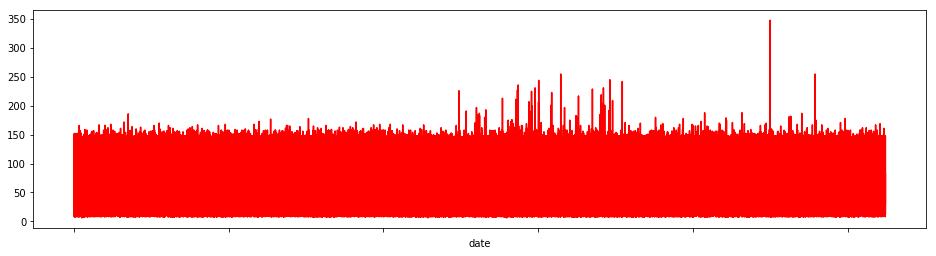

In [6]:
# Creating time series for data:
tlen = pd.Series(data=data['len'].values, index=data['date'])

# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

In [7]:
# This is the sentiment analysis section for textblob, no training was done

from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    

In [8]:
# Created a column with the result of the analysis:
data['SA_tb'] = np.array([ analize_sentiment(tweet) for tweet in data['tweet'] ])

# Displaing the updated dataframe with the new column:
display(data.head())

# Writting the new file with length and date as a string for graphing

data = data.sort_values(by='date_mmyy', ascending=True)

data.to_csv("C:/Users/Joe/Documents/Coursera/University of Michigan/Python/1600000tweets/training_1600000_processed_noemoticon_len.csv", index=False)
#data.to_csv("C:/Users/Joe/Documents/Coursera/University of Michigan/Python/1600000tweets/100tweets_100.csv", index=False)

,target,id,date,flag,user,tweet,len,date_mmyy,SA_tb
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06 22:19:49,0
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06 22:19:53,1
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06 22:19:57,1
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06 22:19:57,-1
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,29,2009-04-06 22:20:00,1


In [9]:
# Constructing lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['tweet']) if data['SA_tb'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['tweet']) if data['SA_tb'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['tweet']) if data['SA_tb'][index] < 0]

In [10]:
# We print percentages:

print("Count of positive tweets: {}".format(len(pos_tweets)))
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['tweet'])))
print("Count of neutral tweets: {}".format(len(neu_tweets)))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['tweet'])))
print("Count of negative tweets: {}".format(len(neg_tweets)))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['tweet'])))


Count of positive tweets: 393460
Percentage of positive tweets: 37.523305438332976%
Count of neutral tweets: 373856
Percentage of neutral tweets: 35.65372052547505%
Count of negative tweets: 281259
Percentage of negative tweets: 26.822974036191976%


799995    2009-06-25 10:28:28
799994    2009-06-25 10:28:28
799997    2009-06-25 10:28:30
799996    2009-06-25 10:28:30
799998    2009-06-25 10:28:31
Name: date_mmyy, dtype: object

1048575


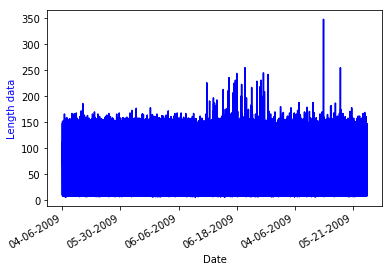

In [11]:
# ploting tweet lenghts and sentiment along a time axis:

fig, ax1 = plt.subplots()

date = data.date_mmyy.astype('O')
#display(date.tail(5)) -issue, for some reason the file is not sorting correctly on date cloumn.  
# Additonaly it is worth noting that only 1.04 of the 1.6 meg file is pulled in because
# the data is stored in a csv format
N = len(data)
print(N)
ind = np.arange(N)  # the evenly spaced plot indices 

def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return date[thisind].strftime('%m-%d-%Y')

tlen = pd.Series(data=data['len'].values, index=data['date_mmyy'])
ax1.plot(ind, data.len, 'b-')
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax1.set_xlabel('Date')
ax1.set_ylabel('Length data', color='b')

fig.autofmt_xdate()

plt.show()


<class 'pandas.core.series.Series'>


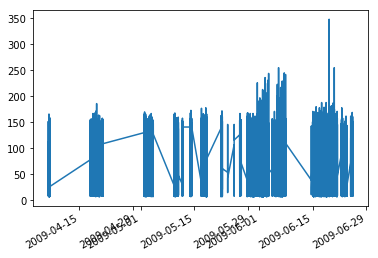

In [12]:
fig, ax = plt.subplots()
ax.plot(data.date_mmyy, data.len)
print(type(data.date_mmyy))

fig.autofmt_xdate()

# This format show s the gap in the data
    
plt.show()

C:\Users\Joe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


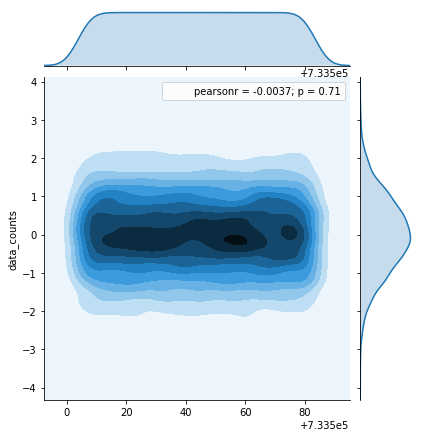

In [13]:
# Import Data to plot the semtiment information
data_counts = data.groupby(['date_mmyy', 'len']).size().reset_index(name='counts')

# Decorations

dates = pd.date_range(start = min, end = max, periods=10000)
df = pd.DataFrame({"dates": dates, "data_counts": np.random.randn(10000)})

xdata, ydata = df["dates"], df["data_counts"]
sns.jointplot(x=mdates.date2num(xdata.astype(datetime)), y=ydata, kind="kde")

plt.show()
